In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys
import pickle
import os
import re
# sys.path.insert(0, '/home/abhishekshar/hierarchichal_point_process/src/result/')

In [3]:
data_names = ["retweet", "meme", "mimic2", "book_order", "so"]
metric_names = ["loss", "marker_ll", "time_ll", "auc", "accuracy", "marker_rmse", "time_rmse"]
hyperparam_names = ['gamma', 'dropout', 'batch_size', 'hidden_dim', 'l2', 'latent_dim', 'maxgradnorm', 'lr', 'n_cluster', 'seed', 'time_loss']

In [4]:
model = "model11"

# Define functions here

In [5]:
create_path = lambda data, model: '/home/abhishekshar/hierarchichal_point_process/src/result/'+data+'/'+model+'/'

In [6]:
def extract_metric_value(x):
    try:
        val = float(re.search('.*\t([\-]*[0-9\.]+)\n$', x).group(1))
    except:
        val = None
    return val

In [7]:
def extract_metric_from_file(file_path):
#     print(file_path)
    with open(file_path,"r") as file:
        results_raw = file.readlines()
        metrics_raw = list(filter(lambda x: 'Test results' in x, results_raw))
        metrics = list(map(extract_metric_value, metrics_raw))
        
    return metrics

In [8]:
def get_filenames_dataset_model(data_name, model):
    return next(os.walk(create_path(data_name, model)))[2]

In [9]:
def dataname_model_to_metrics(data_name, model):
    filenames = get_filenames_dataset_model(data_name, model)
    file_paths = map(lambda x: create_path(data_name, model)+x, filenames)
#     print(data_name, model, file_paths)
    
    metrics_list = list(map(extract_metric_from_file, file_paths))
    return metrics_list

In [10]:
def dataname_model_to_hyperparams(data_name, model):
    return list(map(extract_hyperparameters, get_filenames_dataset_model(data_name, model)))

In [11]:
# Sanity check: path is valid
create_path("meme", "model11")

'/home/abhishekshar/hierarchichal_point_process/src/result/meme/model11/'

In [12]:
def extract_hyperparameters(string):
    def tofloat(x):
        try:
            return float(x)
        except:
            return x
#     print(string)
    hyperparams = re.search('_g([0-9\.]+)_do([0-9\.]+)_b([0-9]+)_h([0-9]+)_l2([0-9\.]+)_l([0-9]+)_gn([0-9\.]+)_lr([0-9\.e\-]+)_c([0-9]+)_s([0-9]+)_tl([a-z]+)', string).groups()
    hyperparams = list(map(tofloat, hyperparams))
    return hyperparams

In [13]:
dfs_hyperparams = [pd.DataFrame(dataname_model_to_hyperparams(data_name, model), columns=hyperparam_names) for data_name in data_names]

In [14]:
dfs_metrics = [pd.DataFrame(dataname_model_to_metrics(data_name, model), columns=metric_names) for data_name in data_names]

In [15]:
df_metrics = pd.concat(dfs_metrics, keys=data_names)
df_hyperparams = pd.concat(dfs_hyperparams, keys=data_names)

In [16]:
# df_metrics

In [17]:
# df_hyperparams

In [18]:
df_final = pd.concat([df_hyperparams, df_metrics], axis=1)

In [19]:
df_final.loc['mimic2']

,gamma,dropout,batch_size,hidden_dim,l2,latent_dim,maxgradnorm,lr,n_cluster,seed,time_loss,loss,marker_ll,time_ll,auc,accuracy,marker_rmse,time_rmse
0,1.0,0.5,128.0,1024.0,0.001,20.0,10.0,0.00100,10.0,1.0,normal,2.068342,-0.866772,-1.162493,None,0.848837,None,0.820695
1,1.0,0.5,128.0,128.0,0.000,20.0,10.0,0.00100,10.0,1.0,normal,2.188723,-0.938001,-1.220970,None,0.837209,None,0.825101
2,1.0,0.5,128.0,128.0,0.000,20.0,10.0,0.00010,10.0,1.0,normal,2.320281,-1.093474,-1.223987,None,0.790698,None,0.821304
3,1.0,0.5,128.0,128.0,0.000,20.0,10.0,0.00001,10.0,1.0,normal,4.883297,-3.602329,-1.290170,None,0.645349,None,0.860958
4,1.0,0.5,128.0,256.0,0.000,20.0,10.0,0.00100,10.0,1.0,normal,2.107123,-0.905745,-1.174871,None,0.843023,None,0.811276
5,1.0,0.5,128.0,256.0,0.000,20.0,10.0,0.00010,10.0,1.0,normal,2.289210,-0.999671,-1.241707,None,0.825581,None,0.813410
6,1.0,0.5,128.0,256.0,0.000,20.0,10.0,0.00001,10.0,1.0,normal,4.672418,-3.427057,-1.258238,None,0.761628,None,0.839334
7,1.0,0.5,128.0,512.0,0.000,20.0,10.0,0.00100,10.0,1.0,normal,2.054996,-0.866203,-1.139017,None,0.848837,None,0.813731
8,1.0,0.5,128.0,512.0,0.000,20.0,10.0,0.00010,10.0,1.0,normal,2.205387,-0.923011,-1.217890,None,0.848837,None,0.799521
9,1.0,0.5,128.0,512.0,0.000,20.0,10.0,0.00001,10.0,1.0,normal,3.779743,-2.534947,-1.253470,None,0.738372,None,0.844657


In [20]:
import matplotlib.pyplot as plt

(-2, 0)

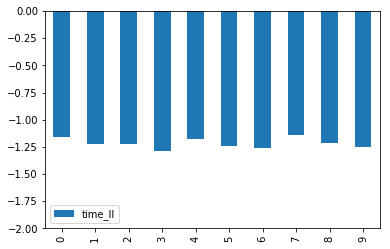

In [44]:
ax = df_final.loc['mimic2'].plot.bar(y='time_ll')
ax.set_ylim((-2,0))

(-2, 0)

In [27]:
dir(df_final.plot)

['__bytes__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_accessors',
 '_constructor',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_reset_cache',
 'area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']